# Lecture 7: Classes, dictionaries and refactoring
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PIMILab/ENGR1050/blob/main/notebooks/lec07.ipynb)

Our first unit is drawing to a close, and in principle everyone should now have a handle on python basics.

## To get started

Run the block of code to generate a subdirectory where you can store data.

In [20]:
import os
# Ensure a small data folder to store downloaded data
os.makedirs('Data', exist_ok=True)
print('Data/ directory ensured')

Data/ directory ensured


# Overview for today

Today we will introduce
- Dictionaries
- Classes

Then we will do an in-class exercise to *refactor* our previous stress/strain data into a nice class that's easy to work with.

**Reminder:** Monday is an exam prep day, Wed is our first exam. There is [one more homework](https://canvas.upenn.edu/courses/1881448/assignments/13974459) that will be due a week from Monday so that you have some extra time after the exam to work on it.

In today's lecture I pointed to some resources you can use to help prepare for the exam. Remember that learning Python is like learning a foreign language; you can try memorizing syntax/grammar, but at the end of the day you will only become fluent through practice! In the course I've intentionally avoided more complicated aspects of Python to get you up and running, so these will have more in them than what you need. If you stick to the variables, lists, loops, conditionals, and classes sections you will get good practice for the exam.

| Platform | Link | Key Features | Notes |
|----------|------|--------------|--------------------|
| **FutureCoder** | [futurecoder.io](https://futurecoder.io) | Fully interactive, step-by-step lessons with debugging tools, error explanations, and exercises. | Excellent for complete beginners; focuses on learning by doing. |
| **LearnPython.org** | [learnpython.org](https://www.learnpython.org) | Interactive tutorials covering Python basics (variables, loops, functions, data structures). | More comprehensive, including more features than we covered in class.|

# Dictionaries

### Basic syntax

```python
dictionaryName = {key1:value1,...,keyN:valueN}
```

where `key1`-`keyN` are keys (typically a string) and `value1`-`valueN` are objects associated with the key (can be anything, same as a list)

### Simple example
Lets say I'm trying to keep track of how many pets I have in my house. I could store that information in a list.
```python
list1 = ['Cats','Dogs','Lizards']
list2 = [6,3,18]
for dataPair in zip(list1,list2):
    if dataPair[0] == 'Lizards':
        print(f'Prof Trask has {dataPair[1]} {dataPair[0]} in his house.')
```

That's painful, particularly if you have a huge list. Instead, we can directly grab entries through the keys of a dictionary.
```python
mydict = {'Cats':6,'Dogs':3,'Lizards':18}
key = 'Lizards'
print(f'Prof Trask has {mydict[key]} {key} in his house.')
```

In [1]:
list1 = ['Cats','Dogs','Lizards']
list2 = [6,3,18]
for dataPair in zip(list1,list2):
    if dataPair[0] == 'Lizards':
        print(f'Prof Trask has {dataPair[1]} {dataPair[0]} in his house.')

Prof Trask has 18 Lizards in his house.


In [2]:
mydict = {'Cats':6,'Dogs':3,'Lizards':18}
key = 'Lizards'
print(f'Prof Trask has {mydict[key]} {key} in his house.')


Prof Trask has 18 Lizards in his house.


### Basic functionality (quick reference)
- **Create**:
	```python
	# a couple ways to create empty dictionaries
	mydict = {}
	other = dict()
	# or to initialize a dictionary so that is starts with several entries
	mydict2 = {"key1":1.2,"key2":3.5}
	```
- **Read**:
	```python
	# direct (may raise KeyError if the key hasn't been defined)
	value = mydict['key']
	# safe (if key5 hasn't been defined, return a default value)
	value = mydict.get('key', 0)
	```
- **Write**:
	```python
	# add a key. if the key already exists change the value associated with it
	mydict['temperature'] = 23.5
	```
- **Remove**:
	```python
	# delete an entry (KeyError if missing)
	del mydict['temperature']
	# pop with default (works the same way as pop for lists, returns default value [None] if key doesn't exist)
	temp = mydict.pop('temperature', None)
	```
- **Iterate**:
	```python
	# keys only
	for k in mydict:
	    print(k, mydict[k])
	# values only
	for v in mydict.values():
	    print(v)
	# key/value pairs
	for k, v in mydict.items():
	    print(k, v)
	```

## Exercise 1

From Lecture 3 we had the following lists of players and RBIs. If I asked you to get Garrett Stubbs' RBIs, you would need to use a `for` loop to iterate all the way to the bottom of the list, find the `stubbsIndex` associated with that name, and then look up the corresponding `rbi[stubbsIndex]`. As you start looking at datasets with billions of entries, this will be a huge problem. Instead, build a `rbiDictionary` with player names as the key and rbis as the value so that calling `rbiDictionary['Garrett Stubbs']` instantly returns the corresponding number.

In [21]:
from re import I

players = [
    "Trea Turner",
    "Kyle Schwarber",
    "Nick Castellanos",
    "J.T. Realmuto",
    "Bryson Stott",
    "Bryce Harper",
    "Alec Bohm",
    "Max Kepler",
    "Brandon Marsh",
    "Edmundo Sosa",
    "Johan Rojas",
    "Otto Kemp",
    "Rafael Marchan",
    "Harrison Bader",
    "Weston Wilson",
    "Cal Stevenson",
    "Buddy Kennedy",
    "Kody Clemens",
    "Garrett Stubbs"
]
rbis = [
    66,   # Trea Turner
    119,  # Kyle Schwarber
    61,   # Nick Castellanos
    47,   # J.T. Realmuto
    55,   # Bryson Stott
    64,   # Bryce Harper
    64,   # Alec Bohm
    20,   # Max Kepler
    31,   # Brandon Marsh
    4,    # Edmundo Sosa
    70,   # Johan Rojas
    0,    # Otto Kemp
    0,    # Rafael Marchan
    0,    # Harrison Bader
    0,    # Weston Wilson
    0,    # Cal Stevenson
    0,    # Buddy Kennedy
    0,    # Kody Clemens
    0     # Garrett Stubbs
]


To do this:
- Define a new dictionary (e.g. `rbiDictionary  {}`)
- Loop over the names and rbis (e.g. `for datapair in zip(players,rbis):`)
- Add each to the dictionary (e.g. `rbiDictionary[datapair[0]] = datapair[1]`)
- Finally, check a name and make sure the dictionary looks up the appropriate RBI (e.g. `print(rbiDictionary['Kyle Schwarber'])`)

In [23]:
rbiDictionary = {}
for datapair in zip(players,rbis):
  rbiDictionary[datapair[0]] = datapair[1]
print(rbiDictionary['Kyle Schwarber'])


119


## Exercise 2

We can use dictionaries to efficiently build histograms. Yesterday afternoon, I took the train to Reading terminal market and asked 50 people if they prefer hoagies, pretzels, or pizza. I stored their responses in the list below.

```python
RTMSnackSurvey_List = [
 "Hoagies","Pretzels","Hoagies","Pizza","Hoagies",
 "Pretzels","Hoagies","Hoagies","Pizza","Pretzels",
 "Hoagies","Pizza","Pretzels","Hoagies","Hoagies",
 "Pretzels","Pizza","Hoagies","Pretzels","Hoagies",
 "Pizza","Hoagies","Pretzels","Hoagies","Pretzels",
 "Pizza","Hoagies","Hoagies","Pretzels","Pizza",
 "Hoagies","Pretzels","Pretzels","Pizza","Hoagies",
 "Hoagies","Pretzels","Pizza","Hoagies","Pretzels",
 "Pizza","Hoagies","Pretzels","Hoagies","Hoagies",
 "Pizza","Pretzels","Hoagies","Pizza","Pretzels"
]
```
To build up a histogram of responses, implement code following the steps below:
- Generate an empty dictionary (i.e. `RTMSnackSurvey_Dict = {}`)
- The dictionary will use 'Hoagies', 'Pretzels' or 'Pizza' as a key, and the value will store the number of times they appear in the above list.
- Start by adding a zero count for each (i.e. `RTMSnackSurvey["Hoagies"] = 0"`, and similarly for the other two categories)
- Loop over the list (e.g. `for entry in RTMSnackSurvey_List:`)
- Increment the corresponding element of the dictionary (e.g. `RTMSnackSurvey_Dict[entry] = RTMSnackSurvey_Dict[entry] + 1`)
- Generate a histogram by calling:
```python
import matplotlib.pyplot as plt
labels = list(RTMSnackSurvey_Dict.keys())
counts = [RTMSnackSurvey_Dict[k] for k in labels]
plt.bar(labels, counts)
plt.ylabel('Count')
plt.title('Reading Terminal Market snack preferences')
plt.show()
```

In [24]:
RTMSnackSurvey_List = [
 "Hoagies","Pretzels","Hoagies","Pizza","Hoagies",
 "Pretzels","Hoagies","Hoagies","Pizza","Pretzels",
 "Hoagies","Pizza","Pretzels","Hoagies","Hoagies",
 "Pretzels","Pizza","Hoagies","Pretzels","Hoagies",
 "Pizza","Hoagies","Pretzels","Hoagies","Pretzels",
 "Pizza","Hoagies","Hoagies","Pretzels","Pizza",
 "Hoagies","Pretzels","Pretzels","Pizza","Hoagies",
 "Hoagies","Pretzels","Pizza","Hoagies","Pretzels",
 "Pizza","Hoagies","Pretzels","Hoagies","Hoagies",
 "Pizza","Pretzels","Hoagies","Pizza","Pretzels"
]
RTMSnackSurvey_Dict =["Hoagies":0 "Pretzels":0 "Pizza":0]

SyntaxError: invalid syntax (ipython-input-52426898.py, line 13)

# Classes

The syntax for classes comes in a few flavors.

1. Classes with no instances.
2. Classes with instances.
3. Classes with inheritance.

We gave examples of each in the slides for todays class.

**Example 1: Classes with no instances.** Just a container for objects. You can use these to group collections of variables and functions. In this setting, a class can have variables or functions that can be accesed through the period (e.g. `className.variableName` or `className.functionName()`)

In [25]:
class GenericDog:
    what_do_they_go = 'Dogs go woof'
    def whatKindofAnimal():
        return f"I am a dog!"
    def doIhaveHair=
print(GenericDog.whatKindofAnimal())
print(GenericDog.what_do_they_go)

SyntaxError: expected '(' (ipython-input-1275117799.py, line 5)

**Example 2: Classes with instances.** You can use this to specialize different instances of a class. For this the key ingredients are:
- `init` - a function that is automatically called when you initialize the class. We use the arguments to this function to specialize the class.
- `self.variableName` - private variables that are *not* shared across all instances of a class

The key idea here is that there is a set of functions that make sense for any dog, but there are different details for each.

In [5]:
class Dog:
    def __init__(self, name, age, breed):
        self.name = name
        self.age = age
        self.breed = breed

    def whatKindofAnimal(self):
        return f"I am a dog!"

    def bark(self):
        return f"{self.name} says woof!"

    def get_info(self):
        return f"Name: {self.name}, Age: {self.age}, Breed: {self.breed}"

# Example usage. Instantiate two different dog objects
my_dog1 = Dog("Buddy", 3, "Golden Retriever")
my_dog2 = Dog("Fido", 5, "Cocker Spaniel")

#Look at how it specializes across the different instances of Dog
print(my_dog1.whatKindofAnimal())
print(my_dog1.bark())
print(my_dog1.get_info())

print(my_dog1.whatKindofAnimal())
print(my_dog2.bark())
print(my_dog2.get_info())

I am a dog!
Buddy says woof!
Name: Buddy, Age: 3, Breed: Golden Retriever
I am a dog!
Fido says woof!
Name: Fido, Age: 5, Breed: Cocker Spaniel


**Example 3: Classes with inheritance.** We can generalize classes to describe taxonomies (i.e. dog with a job is an example of a dog is an example of an animal and so on). This allows us to design classes generically at a broad level and then build new classes that have all of the properties of the *parent* or *base* class. In the following example, we define a `workingDog`, which is the exact same thing as a normal dog but they also have a `self.job`.

For these, the important ingredients are:
- `class ChildClass(parentClass)` - in the definition of the class, you need to point it to the base class
- `super().__init__1 - you need to tell it how to call the initializer of the parent class

In [6]:
class WorkingDog(Dog):
    def __init__(self, name, age, breed, job):
        super().__init__(name, age, breed)
        self.job = job

    def bark(self):
        return f"{self.name} says woof, I'm a {self.job}!"

    def do_job(self):
        return f"{self.name} is doing their job: {self.job}"

# Example usage:
working_dog = WorkingDog("Max", 4, "German Shepherd", "Police Dog")
print(working_dog.bark())
print(working_dog.get_info())
print(working_dog.do_job())

Max says woof, I'm a Police Dog!
Name: Max, Age: 4, Breed: German Shepherd
Max is doing their job: Police Dog


### Abstract base classes

Sometimes we will define a base class that doesn't actually implement functions. For example, any shape has an area, but we need to specify what shape we're talking about for it to make sense to calculate. We call these *abstract base classes*. In the example below, we build an abstract base class `Shape` with a child class `Rectangle`.

In [7]:
class Shape:
    def __init__(self, color):
        self.color = color

    def area(self):
        pass  # This method will be overridden in subclasses. Returning pass signifies that this is meant to be overloaded

class Rectangle(Shape):
    def __init__(self, color, width, height):
        super().__init__(color)
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

# Example usage:
rect = Rectangle("blue", 5, 10)
print(f"A {rect.color} rectangle with area: {rect.area()}")

A blue rectangle with area: 50


### Exercise:

Recall that the area of an ellipse is with semi-major axis \(a\) and semi-minor axis \(b\) is

$$A = \pi a b.$$

Generate a new `Ellipse` subclass.
- In your class, you will need to input the semi-major and semi-minor axes.
- You will write your own area function that doesn't just do base times height, and instead uses the formula above.
- When you call the following function, it should print out the correct area (in this case, $\pi$).
```
# Example usage:
myEllipse = Ellipse("blue", 1,1)
print(f"A {rect.color} ellipose with area: {rect.area()}")
```

In [11]:
import math
class Ellipse(Shape):
    def __init__(self, color, major, minor):
        super().__init__(color)
        self.major = major
        self.minor = minor

    def area(self):
        return math.pi * self.major * self.minor

# Example usage:
myEllipse = Ellipse("blue", 5, 10)
print(f"A {myEllipse.color} ellipse with area: {myEllipse.area()}")

A blue ellipse with area: 157.07963267948966


# Today's exercise - refactoring a dataloader

We are going to revisit our stress/strain dataset from NIST that we plotted in [Lecture 4](https://colab.research.google.com/github/PIMILab/ENGR1050/blob/main/notebooks/lec04.ipynb), but use classes to encapsulate the functionality. When we did that exercise, we did a lot of copy and pasting to process three different datasets. That can get messy - instead we will generate a class `dataLoader` which will take a url as an input and has functions to download, clean, and plot the corresponding data. To get you started, I've copied over code for the complete Lecture 4 exercise below, which we will *refactor* - a fancy word for rewriting code into something more readable and functional.

In [12]:
# We need some libraries to handle CSV files (the file format NIST used to store their data) and to download files from the internet
import csv
import urllib.request

# NIST CSVs for the same material: AA6xxx-T81 sheet (three different orientations/repeats)
urls = [
    "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U15Al6XXX-T81_BatchB13R01T2.6921W12.71.csv",
    "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U30Al6XXX-T81_BatchB8R01T2.693W12.66.csv",
    "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U90Al6XXX-T81_BatchB5R03T2.684W12.68.csv",
]

# curves will be a list where each element is a list of [displacement_mm, force_kN] pairs
curves = []

# Loop over each URL, download the file, read the data, and store it in curves
for url in urls:
    local_name = 'Data/'+url.split("/")[-1]
    urllib.request.urlretrieve(url, local_name)  # download the file to the current directory

    # Read in the CSV file, appending each [displacement, force] pair as a new entry in the list
    data = []
    with open(local_name, newline="") as f:
        reader = csv.DictReader(f)
        for row in reader:
            # Columns per NIST spec: "Displacement_(mm)" and "Force_(kN)"
            d = float(row["Displacement_(mm)"])
            F = float(row["Force_(kN)"])
            data.append([d, F])
    curves.append(data)

# Curvess is now a list of lists: 3 lists for each experiment, each containing [displacement, force] pairs
print(len(curves), "curves loaded")
print("First 5 [displacement_mm, force_kN] points of curve 1:", curves[0][:5])

3 curves loaded
First 5 [displacement_mm, force_kN] points of curve 1: [[-22.3829, -0.0061], [-22.3699, 0.0102], [-22.3829, 0.0134], [-22.3699, 0.0134], [-22.3667, 0.0134]]


This was the code to loop over everything and clean it up

In [13]:
# Extract curves
curve1 = curves[0]
curve2 = curves[1]
curve3 = curves[2]

# Cleaned curves will store [relative displacement, force] pairs
cleanedCurve1 = []
cleanedCurve2 = []
cleanedCurve3 = []

# Store first displacement values for each curve
firstEntry1 = curve1[0][0]
firstEntry2 = curve2[0][0]
firstEntry3 = curve3[0][0]

# Clean curve1
for entry in curve1:
    rel_disp = entry[0] - firstEntry1
    cleanedCurve1.append([rel_disp, entry[1]])

# Clean curve2
for entry in curve2:
    rel_disp = entry[0] - firstEntry2
    cleanedCurve2.append([rel_disp, entry[1]])

# Clean curve3
for entry in curve3:
    rel_disp = entry[0] - firstEntry3
    cleanedCurve3.append([rel_disp, entry[1]])

This code generated plots

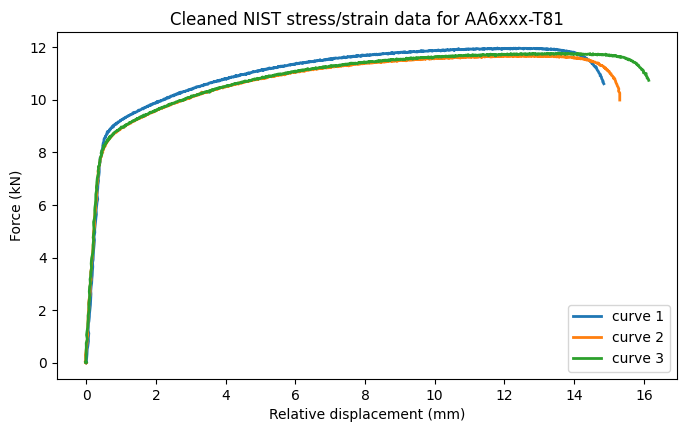

In [14]:
# plot the cleaned curves
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4.5))
plt.plot([p[0] for p in cleanedCurve1], [p[1] for p in cleanedCurve1], label='curve 1', lw=2)
plt.plot([p[0] for p in cleanedCurve2], [p[1] for p in cleanedCurve2], label='curve 2', lw=2)
plt.plot([p[0] for p in cleanedCurve3], [p[1]   for p in cleanedCurve3], label='curve 3', lw=2)
plt.xlabel('Relative displacement (mm)')
plt.ylabel('Force (kN)')
plt.title('Cleaned NIST stress/strain data for AA6xxx-T81')
plt.legend()

## Refactoring

I'll help you get started. The following gives you a skeleton of a class that takes a url string as input

In [16]:
import os
import csv

class DataLoader:
    """A class to load, clean, and plot stress/strain data from NIST CSV files."""

    def __init__(self, url):
        """When initializing, download the file from the given URL and store it in self.raw_curve"""
        import urllib.request

        # Download file if not already present
        local_name = 'Data/' + url.split("/")[-1]
        if not os.path.exists(local_name):
            urllib.request.urlretrieve(url, local_name)

        # Read and store raw data
        self.raw_curve = []
        with open(local_name, newline="") as f:
            reader = csv.DictReader(f)
            for row in reader:
                d = float(row["Displacement_(mm)"])
                F = float(row["Force_(kN)"])
                self.raw_curve.append([d, F])

The code snippet below gives and example of how to instantiate the class and access the raw data inside it.

In [15]:
# Example: create a DataLoader instance for the first NIST CSV URL
url_example = "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U15Al6XXX-T81_BatchB13R01T2.6921W12.71.csv"
loader = DataLoader(url_example)
print("First 5 [displacement_mm, force_kN] points:", loader.raw_curve[:5])

First 5 [displacement_mm, force_kN] points: [[-22.3829, -0.0061], [-22.3699, 0.0102], [-22.3829, 0.0134], [-22.3699, 0.0134], [-22.3667, 0.0134]]


Your job is going to be to add variables and functions to the class so that we can easily clean and generate plots of the data. You should be able to run the following nice and easy to read code once your class has successfully been defined.

```python
url_example = "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U15Al6XXX-T81_BatchB13R01T2.6921W12.71.csv"
loader = DataLoader(url_example)
loader.cleanData()
loader.generatePlot()
```

I will step you through the changes you need to make step by step.

### Add a data cleanup function

- Add a boolean variable `isCleaned` to the class that we can use to track whether the dataset has been cleaned up yet. It should be initialized to `False`. Remember to use `self.isCleaned` to make a variable specific to this dataset
- Add an empty list to store cleaned data, `self.cleanedData = []`
- Add a function `def cleanData(self):`
- In the function: Copy and paste the code that cleaned up the data previously
- In the function: Change the value of isCleaned to `True`

### Add a generate plot function

- Add a function `def generatePlot(self):`
- Copy and paste the code we generated before to make a plot into the `generatePlot` code block
- Make the code point to the appropriate variables inside of the class

### Run your completed class

Run the code block
```python
url_example = "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U15Al6XXX-T81_BatchB13R01T2.6921W12.71.csv"
loader = DataLoader(url_example)
loader.cleanData()
loader.generatePlot()
```
To receive credit for todays exercise, the code block below should generate a nice stress/strain curve.

In [18]:
import os
# Ensure a small data folder to store downloaded data
os.makedirs('Data', exist_ok=True)
print('Data/ directory ensured')

Data/ directory ensured


In [35]:
import os
import csv

class DataLoader:
    """A class to load, clean, and plot stress/strain data from NIST CSV files."""

    def __init__(self, url):
        """When initializing, download the file from the given URL and store it in self.raw_curve"""
        import urllib.request

        # Download file if not already present
        local_name = 'Data/' + url.split("/")[-1]
        if not os.path.exists(local_name):
            urllib.request.urlretrieve(url, local_name)

        # Read and store raw data
        self.raw_curve = []
        with open(local_name, newline="") as f:
            csv_reader = csv.DictReader(f)
            for row in csv_reader:
                disp = float(row["Displacement_(mm)"])
                force = float(row["Force_(kN)"])
                self.raw_curve.append([disp, force])

        self.isCleaned = False
        self.cleanedData = []

    def cleanData(self):
        firstEntry1 = self.raw_curve[0][0]
        for entry in self.raw_curve:
          rel_disp = entry[0] - firstEntry1
          self.cleanedData.append([rel_disp, entry[1]])
        self.isCleaned = True

    def generatePlot(self):
      import matplotlib.pyplot as plt
      plt.figure(figsize=(8,4.5))
      plt.plot([p[0] for p in self.cleanedData], [p[1] for p in self.cleanedData], label='Stress-Strain', lw=2)
      plt.xlabel('Strain')
      plt.ylabel('Stress')
      plt.title('Cleaned NIST stress/strain data for AA6xxx-T81')
      plt.legend()

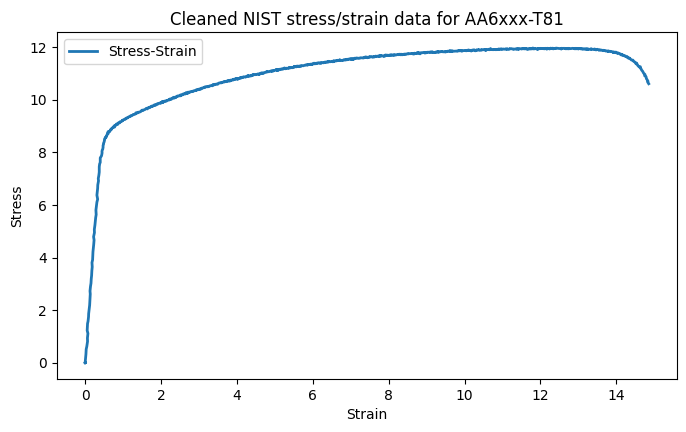

In [36]:
# If you completed the class with the cleanData and generatePlot methods, running the code block below should generate a nice stress/strain curve.
url_example = "https://data.nist.gov/od/ds/ark:/88434/mds2-2202/UniaxialTension/Al6xxx-T81/U15Al6XXX-T81_BatchB13R01T2.6921W12.71.csv"
loader = DataLoader(url_example)
loader.cleanData()
loader.generatePlot()

# Submit today's work #
Today's assignment will be submitted individually.

1. Run any blocks of code so that the notebook contains the output of your code.
2. Save your notebook (File > Save or Ctrl+S).
3. Download your notebook as an `.ipynb` file:
   - In Colab: File > Download > Download .ipynb
   - In Jupyter: File > Download as > Notebook (.ipynb)
4. Go to the [Canvas assignment page](https://canvas.upenn.edu/courses/1881448/assignments/13974458) for this lecture.
5. Upload your `.ipynb` file and submit.
6. Double-check that your file uploaded correctly and is not empty.

While we're still learning the ropes, you **should not be using AI**. Discussion with your neighbors is welcome. Attribute any external resources you used here to comply with Penn's academic integrity policy.